In [2]:
import torchvision
from torch import Tensor, flatten
import numpy as np

from utils import train_vae_classifier
from vae.mnist_vae import  VaeAutoencoderClassifier
from plots import plot_training_result, plot_image_data
from dataset.mnist import prepare_mnist_dataset
from image_classifier.image_classifier import neural_network, train_model, test_model

2024-05-02 11:56:58.082382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 11:56:58.759489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
training_data = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=torchvision.transforms.ToTensor())

input = training_data.data[:60000] / 255.0
labels = training_data.targets[:60000]



In [4]:
vae = VaeAutoencoderClassifier(dim_encoding=2)

vae_classifier_model, total_losses, classifier_accuracy_li, classifier_loss_li, vae_loss_li, kl_loss_li = train_vae_classifier(
    vae,
    training_data,
    batch_size=64,
    alpha=5000.0,
    epochs=1
)


Finished epoch:  1


In [5]:
# move tensors to cpu before converting to np array
np_classifier_accuracy_li = []
np_classifier_loss_li = []
np_vae_loss_li = []
np_kl_loss_li = []

for output in classifier_accuracy_li:
    if isinstance(output, Tensor):
        np_classifier_accuracy_li.append(output.cpu().detach().numpy())

for output in classifier_loss_li:
    if isinstance(output, Tensor):
        np_classifier_loss_li.append(output.cpu().detach().numpy())
        
for output in vae_loss_li:
    if isinstance(output, Tensor):
        np_vae_loss_li.append(output.cpu().detach().numpy())

for output in kl_loss_li:
    if isinstance(output, Tensor):
        np_kl_loss_li.append(output.cpu().detach().numpy())


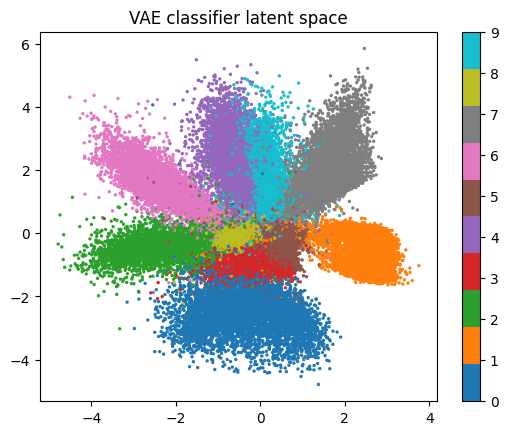

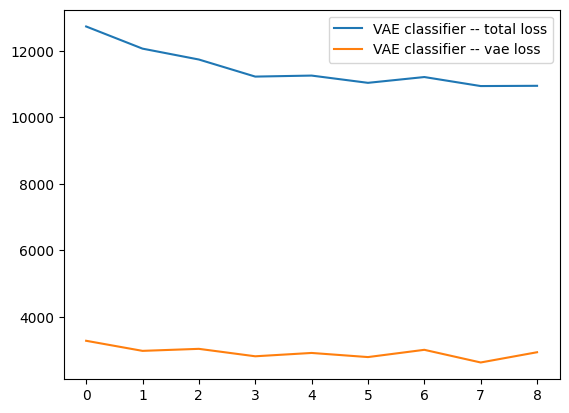

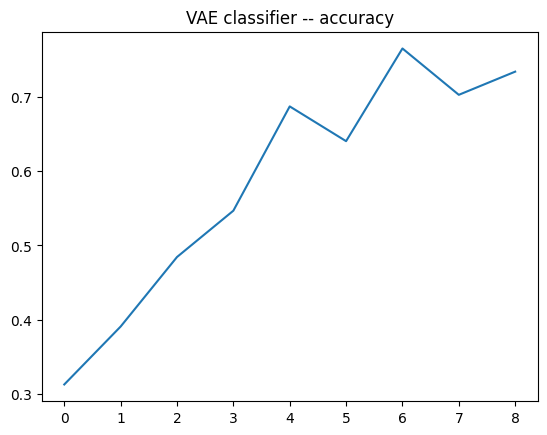

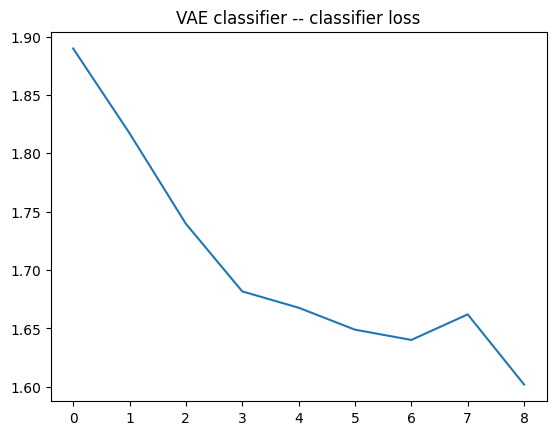

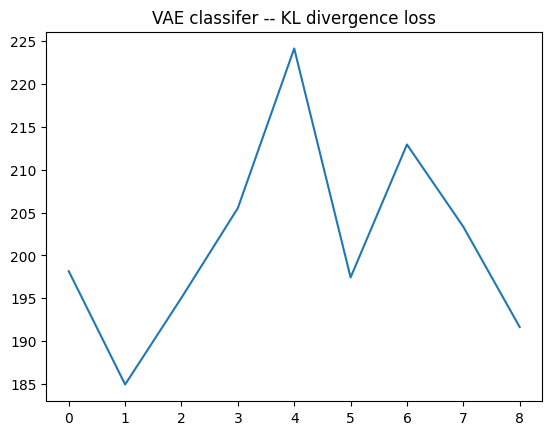

In [9]:
# plot results
plot_training_result(
    input=input,
    labels=labels,
    vae_model_classifier=vae_classifier_model,
    vae_loss_li=np_vae_loss_li,
    total_losses=total_losses, 
    classifier_accuracy_li=np_classifier_accuracy_li, 
    classifier_loss_li=np_classifier_loss_li,
    kl_loss_li=np_kl_loss_li
)

In [10]:
# train classifier for performance evaluation
x_train, x_test, y_train, y_test = prepare_mnist_dataset()

nn_model = neural_network(num_classes=10, num_pixels=784)
train_model(nn_model, x_train, y_train, learning_rate=0.01, epochs=10)
test_model(nn_model, x_test, y_test)

Training images size:  56000
Training input size: 784
Training labels size: 56000
Testing images size:  14000
Testing input size: 784
Testing labels size: 14000
Normalized result (56000, 784) (14000, 784)
Output shape (56000, 10)


2024-05-02 11:49:09.031425: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-02 11:49:09.031920: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-05-02 11:49:09.159592: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 175616000 exceeds 10% of free system memory.


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - accuracy: 0.7314 - loss: 1.0171
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9138 - loss: 0.3016
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.9290 - loss: 0.2426
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.9408 - loss: 0.2042
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9481 - loss: 0.1800
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9556 - loss: 0.1540
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9591 - loss: 0.1394
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9646 - loss: 0.1256
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9690 - loss: 0.1118
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9721 - loss: 0.0999
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.9635 - loss: 0.1279
Error:  3.5928547382354736 %


3200
3200


ValueError: num must be an integer with 1 <= num <= 5, not 6

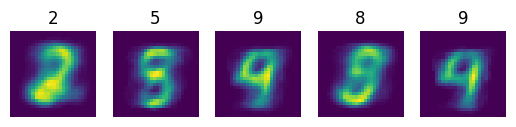

In [5]:
# generate data
x = []
y = []

for i in range(100):
    image_tensor, label_tensor = vae.generate_data()
    image_tensor = flatten(image_tensor, 1)
    x.append(image_tensor.cpu().detach().numpy())
    y.append(label_tensor.cpu().detach().numpy())

gen_x = np.concatenate(x)
gen_y = np.concatenate(y)
assert gen_x.shape[1] == 784
assert gen_y.shape[1] == 10

print(gen_x.shape[0])
print(gen_y.shape[0])

assert gen_x.shape[0] == gen_y.shape[0]

image_tensor, label_tensor = vae.generate_data()
plot_image_data(image_tensor.cpu().detach().numpy(), label_tensor.cpu().detach().numpy())


In [1]:
# test quality of images
test_model(nn_model, gen_x, gen_y)

NameError: name 'test_model' is not defined